## Model for Drone Steering

The tensorflowjs library can't be installed directly with pip / conda due to conflicting dependencies. Best is to set up a new environment explicitly for this and install tensorflowjs with the following commands:

```
pip install tensorflow==1.11.0rc2 h5py numpy keras
pip install --no-deps tensorflowjs
```

In [1]:
! pip install tensorflow==1.11.0rc2 h5py numpy keras
! pip install --no-deps tensorflowjs

  Could not find a version that satisfies the requirement tensorflow==1.11.0rc2 (from versions: 0.12.1, 1.0.0, 1.1.0rc0, 1.1.0rc1, 1.1.0rc2, 1.1.0, 1.2.0rc0, 1.2.0rc1, 1.2.0rc2, 1.2.0, 1.2.1, 1.3.0rc0, 1.3.0rc1, 1.3.0rc2, 1.3.0, 1.4.0rc0, 1.4.0rc1, 1.4.0, 1.4.1, 1.5.0rc0, 1.5.0rc1, 1.5.0, 1.5.1, 1.6.0rc0, 1.6.0rc1, 1.6.0, 1.7.0rc0, 1.7.0rc1, 1.7.0, 1.7.1, 1.8.0rc0, 1.8.0rc1, 1.8.0, 1.9.0rc0, 1.9.0rc1, 1.9.0rc2, 1.9.0, 1.10.0rc0, 1.10.0rc1, 1.10.0, 1.10.1, 1.11.0rc0, 1.11.0, 1.12.0rc0)
No matching distribution found for tensorflow==1.11.0rc2
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

### Inspect Train Data

In [3]:
! ls

drone_steering_model_Laleh.ipynb video_002.csv
video_001.csv                    video_003.csv


In [4]:
#df = pd.read_csv("video_001.csv", delimiter=',')
df = pd.read_csv("video_001.csv")
df.head()


,leftShoulder_x,leftShoulder_y,rightShoulder_x,rightShoulder_y,leftElbow_x,leftElbow_y,rightElbow_x,rightElbow_y,leftWrist_x,leftWrist_y,rightWrist_x,rightWrist_y,label
0,0.72000,0.08000,0.67000,0.52750,0.77500,0.59875,0.75125,0.06750,0.76000,0.01750,0.77000,0.01000,1
1,0.69750,0.06875,0.67125,0.06125,0.77625,0.59500,0.75375,0.06125,0.74750,0.01750,0.77875,0.02000,1
2,0.33000,0.06500,0.29750,0.06125,0.64625,0.05375,0.04625,0.03625,0.74000,0.01500,0.75125,0.00875,1
3,0.80625,0.49750,0.67000,0.49500,0.36125,0.06500,0.04500,0.02000,0.01875,-0.00375,0.00500,0.00875,1
4,0.46625,0.07500,0.35375,0.05875,0.44000,0.05000,0.47875,0.01125,0.49250,-0.00875,0.77875,0.02125,1


In [5]:
#df.count()

In [6]:
df.describe()

,leftShoulder_x,leftShoulder_y,rightShoulder_x,rightShoulder_y,leftElbow_x,leftElbow_y,rightElbow_x,rightElbow_y,leftWrist_x,leftWrist_y,rightWrist_x,rightWrist_y,label
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,0.573217,0.262049,0.471189,0.237971,0.716844,0.368340,0.434795,0.176311,0.294672,0.002049,0.163545,0.008770,2.573770
std,0.292321,0.224713,0.286179,0.225045,0.122026,0.229213,0.359623,0.227640,0.318155,0.008114,0.329788,0.005008,1.244441
min,0.073750,0.041250,-0.017500,0.017500,0.361250,0.017500,0.020000,0.008750,-0.006250,-0.011250,-0.036250,0.000000,1.000000
25%,0.330000,0.063750,0.297500,0.056250,0.655000,0.061250,0.041250,0.023750,0.006250,-0.003750,-0.020000,0.006250,1.000000
50%,0.702500,0.080000,0.662500,0.072500,0.782500,0.503750,0.643750,0.048750,0.027500,0.000000,-0.012500,0.008750,3.000000
75%,0.797500,0.510000,0.673750,0.515000,0.790000,0.515000,0.786250,0.352500,0.642500,0.006250,0.007500,0.011250,4.000000
max,0.813750,0.533750,0.733750,0.553750,0.801250,0.606250,0.801250,0.590000,0.767500,0.017500,0.780000,0.023750,4.000000


In [7]:
df.label.unique()

array([1, 3, 4, 2])

### Load Data and Training Model

In [8]:
import numpy as np

In [9]:
#Load data from a text file, with missing values handled as specified
data_csv = np.genfromtxt('video_001.csv', delimiter=',')


train_x = data_csv[1:50,0:12] 
train_y = data_csv[1:50,12:13]
test_x = data_csv[50:,0:12] 
test_y = data_csv[50:,12:13]

In [10]:
train_x.shape

(49, 12)

In [11]:
train_x.shape

(49, 12)

In [12]:
print(train_x[48][11])

0.00375


In [13]:
print(train_x[48][11])

0.00375


In [14]:
train_y.shape

(49, 1)

In [15]:
print(train_y[20])

[4.]


In [16]:
train_y[4]

array([1.])

In [17]:
print(train_x[0])
print(train_y[0])

[0.72    0.08    0.67    0.5275  0.775   0.59875 0.75125 0.0675  0.76
 0.0175  0.77    0.01   ]
[1.]


In [18]:
from keras.utils import to_categorical
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

/Users/lsafari/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [19]:
train_y.shape

(49, 5)

In [20]:
print(train_x[0])
print(train_y[0])

[0.72    0.08    0.67    0.5275  0.775   0.59875 0.75125 0.0675  0.76
 0.0175  0.77    0.01   ]
[0. 1. 0. 0. 0.]


In [21]:
print(test_x[0])
print(test_y[0])

[ 0.76625  0.51     0.6975   0.55     0.795    0.36625  0.7975   0.35
  0.0275  -0.0025  -0.0125   0.01125]
[0. 1. 0. 0. 0.]


In [54]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(
    6, 
    activation="relu", 
    input_shape=(12, )))
#model.add(layers.Dense(5, activation="relu")) #is a fast rectifier
model.add(layers.Dense(5, activation="softmax")) #probability distribution over 5 different possible outcomes

model.summary()                                         

from keras import optimizers, losses, metrics
model.compile(
    optimizer=optimizers.adam(lr=0.01),
    loss=losses.categorical_crossentropy,
    #metrics=[metrics.categorical_accuracy]
     metrics=["accuracy"] 
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_26 (Dense)             (None, 5)                 35        
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = model.fit(
    train_x,
    train_y,
    epochs=800,
    batch_size=5
)

Epoch 1/800
49/49 [==============================] - 0s 275us/step - loss: 0.6292 - acc: 0.7347
Epoch 2/800
49/49 [==============================] - 0s 266us/step - loss: 0.6305 - acc: 0.7347
Epoch 3/800
49/49 [==============================] - 0s 264us/step - loss: 0.6184 - acc: 0.7143
Epoch 4/800
49/49 [==============================] - 0s 250us/step - loss: 0.6065 - acc: 0.7143
Epoch 5/800
49/49 [==============================] - 0s 287us/step - loss: 0.6084 - acc: 0.7143
Epoch 6/800
49/49 [==============================] - 0s 303us/step - loss: 0.6122 - acc: 0.7143
Epoch 7/800
49/49 [==============================] - 0s 292us/step - loss: 0.6125 - acc: 0.7143
Epoch 8/800
49/49 [==============================] - 0s 280us/step - loss: 0.6170 - acc: 0.7551
Epoch 9/800
49/49 [==============================] - 0s 303us/step - loss: 0.6120 - acc: 0.7551
Epoch 10/800
49/49 [==============================] - 0s 278us/step - loss: 0.6094 - acc: 0.7143
Epoch 11/800
49/49 [===================

49/49 [==============================] - 0s 292us/step - loss: 0.5769 - acc: 0.7755
Epoch 86/800
49/49 [==============================] - 0s 258us/step - loss: 0.5692 - acc: 0.7755
Epoch 87/800
49/49 [==============================] - 0s 269us/step - loss: 0.5590 - acc: 0.7347
Epoch 88/800
49/49 [==============================] - 0s 290us/step - loss: 0.5721 - acc: 0.7347
Epoch 89/800
49/49 [==============================] - 0s 252us/step - loss: 0.5614 - acc: 0.7143
Epoch 90/800
49/49 [==============================] - 0s 274us/step - loss: 0.5692 - acc: 0.7551
Epoch 91/800
49/49 [==============================] - 0s 298us/step - loss: 0.5681 - acc: 0.7755
Epoch 92/800
49/49 [==============================] - 0s 296us/step - loss: 0.5826 - acc: 0.7551
Epoch 93/800
49/49 [==============================] - 0s 288us/step - loss: 0.5544 - acc: 0.7551
Epoch 94/800
49/49 [==============================] - 0s 267us/step - loss: 0.5592 - acc: 0.7959
Epoch 95/800
49/49 [=======================

49/49 [==============================] - 0s 312us/step - loss: 0.5265 - acc: 0.7959
Epoch 169/800
49/49 [==============================] - 0s 291us/step - loss: 0.5238 - acc: 0.7959
Epoch 170/800
49/49 [==============================] - 0s 296us/step - loss: 0.5252 - acc: 0.7755
Epoch 171/800
49/49 [==============================] - 0s 287us/step - loss: 0.5242 - acc: 0.7755
Epoch 172/800
49/49 [==============================] - 0s 289us/step - loss: 0.5282 - acc: 0.7755
Epoch 173/800
49/49 [==============================] - 0s 270us/step - loss: 0.5245 - acc: 0.7755
Epoch 174/800
49/49 [==============================] - 0s 302us/step - loss: 0.5194 - acc: 0.7755
Epoch 175/800
49/49 [==============================] - 0s 287us/step - loss: 0.5262 - acc: 0.7755
Epoch 176/800
49/49 [==============================] - 0s 309us/step - loss: 0.5151 - acc: 0.7959
Epoch 177/800
49/49 [==============================] - 0s 281us/step - loss: 0.5247 - acc: 0.7755
Epoch 178/800
49/49 [=============

49/49 [==============================] - 0s 278us/step - loss: 0.4927 - acc: 0.7959
Epoch 252/800
49/49 [==============================] - 0s 269us/step - loss: 0.4921 - acc: 0.8163
Epoch 253/800
49/49 [==============================] - 0s 279us/step - loss: 0.5003 - acc: 0.8163
Epoch 254/800
49/49 [==============================] - 0s 281us/step - loss: 0.4895 - acc: 0.7959
Epoch 255/800
49/49 [==============================] - 0s 265us/step - loss: 0.4998 - acc: 0.7959
Epoch 256/800
49/49 [==============================] - 0s 262us/step - loss: 0.4962 - acc: 0.7959
Epoch 257/800
49/49 [==============================] - 0s 280us/step - loss: 0.5056 - acc: 0.7959
Epoch 258/800
49/49 [==============================] - 0s 281us/step - loss: 0.4932 - acc: 0.7959
Epoch 259/800
49/49 [==============================] - 0s 295us/step - loss: 0.4875 - acc: 0.8163
Epoch 260/800
49/49 [==============================] - 0s 272us/step - loss: 0.4846 - acc: 0.8163
Epoch 261/800
49/49 [=============

49/49 [==============================] - 0s 268us/step - loss: 0.5127 - acc: 0.7347
Epoch 335/800
49/49 [==============================] - 0s 285us/step - loss: 0.4814 - acc: 0.8776
Epoch 336/800
49/49 [==============================] - 0s 262us/step - loss: 0.4731 - acc: 0.8571
Epoch 337/800
49/49 [==============================] - 0s 282us/step - loss: 0.4643 - acc: 0.8367
Epoch 338/800
49/49 [==============================] - 0s 278us/step - loss: 0.4659 - acc: 0.8163
Epoch 339/800
49/49 [==============================] - 0s 277us/step - loss: 0.4700 - acc: 0.8163
Epoch 340/800
49/49 [==============================] - 0s 306us/step - loss: 0.4676 - acc: 0.8367
Epoch 341/800
49/49 [==============================] - 0s 273us/step - loss: 0.4654 - acc: 0.8571
Epoch 342/800
49/49 [==============================] - 0s 274us/step - loss: 0.4661 - acc: 0.8367
Epoch 343/800
49/49 [==============================] - 0s 287us/step - loss: 0.4614 - acc: 0.8571
Epoch 344/800
49/49 [=============

49/49 [==============================] - 0s 272us/step - loss: 0.4521 - acc: 0.8163
Epoch 418/800
49/49 [==============================] - 0s 285us/step - loss: 0.4542 - acc: 0.8571
Epoch 419/800
49/49 [==============================] - 0s 271us/step - loss: 0.4432 - acc: 0.8367
Epoch 420/800
49/49 [==============================] - 0s 260us/step - loss: 0.4545 - acc: 0.8571
Epoch 421/800
49/49 [==============================] - 0s 278us/step - loss: 0.4447 - acc: 0.8571
Epoch 422/800
49/49 [==============================] - 0s 272us/step - loss: 0.4464 - acc: 0.8571
Epoch 423/800
49/49 [==============================] - 0s 268us/step - loss: 0.4496 - acc: 0.8571
Epoch 424/800
49/49 [==============================] - 0s 256us/step - loss: 0.4542 - acc: 0.8571
Epoch 425/800
49/49 [==============================] - 0s 260us/step - loss: 0.4436 - acc: 0.8776
Epoch 426/800
49/49 [==============================] - 0s 231us/step - loss: 0.4509 - acc: 0.8163
Epoch 427/800
49/49 [=============

49/49 [==============================] - 0s 279us/step - loss: 0.4320 - acc: 0.8571
Epoch 501/800
49/49 [==============================] - 0s 277us/step - loss: 0.4316 - acc: 0.8571
Epoch 502/800
49/49 [==============================] - 0s 267us/step - loss: 0.4524 - acc: 0.8571
Epoch 503/800
49/49 [==============================] - 0s 266us/step - loss: 0.4416 - acc: 0.8367
Epoch 504/800
49/49 [==============================] - 0s 279us/step - loss: 0.4728 - acc: 0.7755
Epoch 505/800
49/49 [==============================] - 0s 261us/step - loss: 0.4595 - acc: 0.8367
Epoch 506/800
49/49 [==============================] - 0s 277us/step - loss: 0.4916 - acc: 0.8571
Epoch 507/800
49/49 [==============================] - 0s 281us/step - loss: 0.4515 - acc: 0.8367
Epoch 508/800
49/49 [==============================] - 0s 272us/step - loss: 0.4702 - acc: 0.7959
Epoch 509/800
49/49 [==============================] - 0s 282us/step - loss: 0.4639 - acc: 0.8367
Epoch 510/800
49/49 [=============

49/49 [==============================] - 0s 259us/step - loss: 0.4148 - acc: 0.8776
Epoch 584/800
49/49 [==============================] - 0s 240us/step - loss: 0.4353 - acc: 0.8571
Epoch 585/800
49/49 [==============================] - 0s 273us/step - loss: 0.4174 - acc: 0.8367
Epoch 586/800
49/49 [==============================] - 0s 234us/step - loss: 0.4159 - acc: 0.8571
Epoch 587/800
49/49 [==============================] - 0s 237us/step - loss: 0.4266 - acc: 0.8367
Epoch 588/800
49/49 [==============================] - 0s 261us/step - loss: 0.4086 - acc: 0.8571
Epoch 589/800
49/49 [==============================] - 0s 257us/step - loss: 0.4209 - acc: 0.8571
Epoch 590/800
49/49 [==============================] - 0s 244us/step - loss: 0.4172 - acc: 0.8367
Epoch 591/800
49/49 [==============================] - 0s 239us/step - loss: 0.4155 - acc: 0.8367
Epoch 592/800
49/49 [==============================] - 0s 228us/step - loss: 0.4125 - acc: 0.8571
Epoch 593/800
49/49 [=============

49/49 [==============================] - 0s 263us/step - loss: 0.3989 - acc: 0.8367
Epoch 667/800
49/49 [==============================] - 0s 272us/step - loss: 0.4002 - acc: 0.8571
Epoch 668/800
49/49 [==============================] - 0s 266us/step - loss: 0.4041 - acc: 0.8367
Epoch 669/800
49/49 [==============================] - 0s 270us/step - loss: 0.4022 - acc: 0.8367
Epoch 670/800
49/49 [==============================] - 0s 283us/step - loss: 0.4026 - acc: 0.8367
Epoch 671/800
49/49 [==============================] - 0s 292us/step - loss: 0.4103 - acc: 0.8571
Epoch 672/800
49/49 [==============================] - 0s 300us/step - loss: 0.4293 - acc: 0.8163
Epoch 673/800
49/49 [==============================] - 0s 305us/step - loss: 0.4182 - acc: 0.8571
Epoch 674/800
49/49 [==============================] - 0s 299us/step - loss: 0.4017 - acc: 0.8571
Epoch 675/800
49/49 [==============================] - 0s 274us/step - loss: 0.4080 - acc: 0.8571
Epoch 676/800
49/49 [=============

49/49 [==============================] - 0s 275us/step - loss: 0.3922 - acc: 0.8571
Epoch 750/800
49/49 [==============================] - 0s 298us/step - loss: 0.3924 - acc: 0.8776
Epoch 751/800
49/49 [==============================] - 0s 262us/step - loss: 0.3999 - acc: 0.8571
Epoch 752/800
49/49 [==============================] - 0s 262us/step - loss: 0.3878 - acc: 0.8571
Epoch 753/800
49/49 [==============================] - 0s 256us/step - loss: 0.3936 - acc: 0.8776
Epoch 754/800
49/49 [==============================] - 0s 286us/step - loss: 0.4049 - acc: 0.8571
Epoch 755/800
49/49 [==============================] - 0s 282us/step - loss: 0.4008 - acc: 0.8571
Epoch 756/800
49/49 [==============================] - 0s 270us/step - loss: 0.4216 - acc: 0.8163
Epoch 757/800
49/49 [==============================] - 0s 268us/step - loss: 0.4323 - acc: 0.8571
Epoch 758/800
49/49 [==============================] - 0s 266us/step - loss: 0.4014 - acc: 0.8571
Epoch 759/800
49/49 [=============

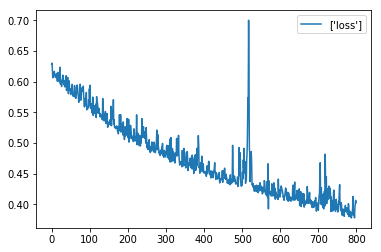

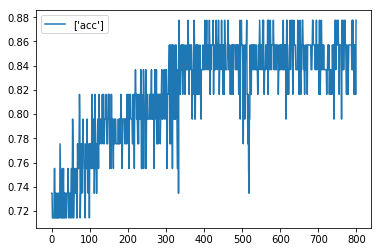

In [58]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label=["loss"]) #play with hyperparameters to see the changes
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["acc"],  label=["acc"])
plt.legend()
plt.show()
plt.close()



In [59]:
test_loss, test_acc = model.evaluate(test_x, test_y)
print("Loss / Accuracy Evaluation")
print("--------------------------")
print("Loss:     " + str(round(test_loss,5)))
print("Accuracy: " + str(round(test_acc,2)))

12/12 [==============================] - 0s 5ms/step
Loss / Accuracy Evaluation
--------------------------
Loss:     6.24349
Accuracy: 0.25


In [26]:
test_y_pred = model.predict(test_x)

In [27]:
test_y_pred

array([[6.42092061e-07, 1.34459979e-05, 5.23041308e-01, 4.76909220e-01,
        3.53431133e-05],
       [2.11981092e-06, 9.03175026e-03, 4.76272479e-02, 1.04905851e-02,
        9.32848275e-01],
       [2.19880165e-14, 9.77610313e-08, 9.99528646e-01, 4.71265055e-04,
        2.52514258e-08],
       [6.91309879e-07, 3.42973246e-04, 9.22216654e-01, 7.68808201e-02,
        5.58931613e-04],
       [1.42983775e-20, 8.13103914e-02, 2.98046103e-07, 9.18611705e-01,
        7.75113294e-05],
       [1.41010643e-26, 9.87540185e-01, 1.15527810e-08, 1.24594793e-02,
        3.13361483e-07],
       [5.71609309e-21, 9.99106467e-01, 8.03601836e-07, 7.06113700e-04,
        1.86525605e-04],
       [3.09977258e-06, 1.15884244e-01, 1.30420886e-02, 1.01649659e-02,
        8.60905588e-01],
       [8.53404465e-14, 1.43175271e-07, 9.99182999e-01, 8.16827873e-04,
        4.05040836e-08],
       [3.29964522e-24, 9.99998569e-01, 1.67519076e-07, 3.50701498e-07,
        9.32815965e-07],
       [2.97253604e-32, 1.0000

### Save Model in tensorflow.js Format

In [28]:
import tensorflowjs as tfjs

ModuleNotFoundError: No module named 'tensorflow_hub'

In [ ]:
tfjs.converters.save_keras_model(model, 'model_tfjs')

We need to adapt the two files as follows in order for them to work on Azure:
* add a file extension .pb to the file with no extension (otherwise Azure blocks it from viewing)
* adapt the automatically generated model.json to reflect the extension .pb